In [4]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split




<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

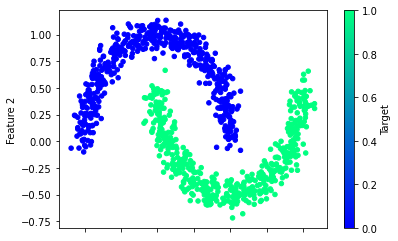

In [2]:


from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [12]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [16]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 782us/step - loss: 0.8419 - accuracy: 0.1907
Epoch 2/100
24/24 [==============================] - 0s 739us/step - loss: 0.8242 - accuracy: 0.1613
Epoch 3/100
24/24 [==============================] - 0s 781us/step - loss: 0.8086 - accuracy: 0.1680
Epoch 4/100
24/24 [==============================] - 0s 779us/step - loss: 0.7946 - accuracy: 0.1693
Epoch 5/100
24/24 [==============================] - 0s 839us/step - loss: 0.7823 - accuracy: 0.1587
Epoch 6/100
24/24 [==============================] - 0s 795us/step - loss: 0.7712 - accuracy: 0.1587
Epoch 7/100
24/24 [==============================] - 0s 794us/step - loss: 0.7614 - accuracy: 0.1613
Epoch 8/100
24/24 [==============================] - 0s 824us/step - loss: 0.7524 - accuracy: 0.1653
Epoch 9/100
24/24 [==============================] - 0s 836us/step - loss: 0.7442 - accuracy: 0.1680
Epoch 10/100
24/24 [==============================] - 0s 771us/step - loss: 0.7366 - accura

24/24 [==============================] - 0s 824us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 82/100
24/24 [==============================] - 0s 867us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 83/100
24/24 [==============================] - 0s 848us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 84/100
24/24 [==============================] - 0s 790us/step - loss: 0.6931 - accuracy: 0.5027
Epoch 85/100
24/24 [==============================] - 0s 737us/step - loss: 0.6931 - accuracy: 0.5027
Epoch 86/100
24/24 [==============================] - 0s 824us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 87/100
24/24 [==============================] - 0s 775us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 88/100
24/24 [==============================] - 0s 781us/step - loss: 0.6931 - accuracy: 0.5027
Epoch 89/100
24/24 [==============================] - 0s 878us/step - loss: 0.6932 - accuracy: 0.5027
Epoch 90/100
24/24 [==============================] - 0s 823us/step - loss: 0.6932 - accuracy: 

<AxesSubplot:>

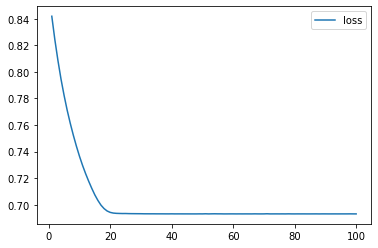

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

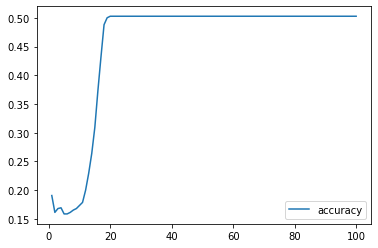

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")